<a href="https://colab.research.google.com/github/Priscilladoyo/US_Tornado_Project/blob/main/US_Tornado_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **US Tornado Prediction Project**

## **Project Overview**

This project examines historical storm and tornado data across the United States, focusing on patterns, frequencies, and other key attributes from 1950 to 2021. Using two datasets, `storm.csv` and `us_tornado_dataset_1950_2021.csv`, this analysis aims to uncover insights into tornado occurrences and their impacts on regions across the country.

## **Project Files**

*   `storm.csv`: Contains general storm data with various attributes, including dates, storm categories, locations, and other relevant metrics.
*   `us_tornado_dataset_1950_2021.csv`: Focused specifically on tornado events from 1950 to 2021, detailing each event’s location, magnitude, casualties, damages, and other relevant metrics.

## **Goals and Objectives**

1. **Analyze Temporal and Geographic Trends of Tornado Occurrences**

  *   **Objective**: Understand yearly, monthly, and time-of-day patterns in tornado occurrences across the U.S., with a focus on identifying trends and seasonal variations.
  *   **Key Questions**:
    *   How many tornadoes have occurred from 1950 to 2021?
    *   Are tornadoes becoming more or less frequent over time?
    *   What are the monthly and seasonal patterns of tornado occurrences?
    *   Which states or regions experience the highest number and intensity of tornadoes?

2. **Examine Tornado Intensity, Impact, and Environmental Factors**

  *   **Objective**: Analyze tornadoes by intensity (Enhanced Fujita scale) and assess correlations between intensity and impact metrics, such as fatalities, injuries, and property damage.
  *   **Key Questions**:
    *   What is the distribution of tornado intensities, and how does this vary over time?
    *   How do fatalities, injuries, and property damages relate to tornado intensity?
    *   Are there any environmental factors, such as temperature and humidity, associated with tornado occurrences?

3. **Conduct a Detailed Analysis of Tornadoes in Texas**

  *   **Objective**: Study the specific characteristics and impact of tornadoes in Texas, examining trends, intensity distribution, and regional hotspots.
  *   **Key Questions**:
    *   How many tornadoes have occurred in Texas, and what is the trend over time?
    *   When do tornadoes most frequently occur in Texas, by month or season?
    *   What are the intensity distribution and impacts (fatalities, injuries, damages) of tornadoes in Texas?
    *   How does tornado frequency and intensity in Texas compare to other states?

4. **Explore the Predictive Potential for Tornado Occurrences**

  *   **Objective**: Identify key variables and build predictive models to determine whether tornadoes can be forecasted based on historical data, focusing on temporal and geographic predictions.
  *   **Key Questions**:
    *   Are there specific factors that strongly correlate with the occurrence of tornadoes?
    *   Can a time series model capture seasonal or monthly patterns in tornado activity?
    *   What is the accuracy and reliability of predictive models in forecasting tornado occurrences and severity?

## **Project Summary**

The US Tornado Project is a data analysis initiative aimed at uncovering patterns, trends, and impacts of tornado occurrences across the United States from 1950 to 2021, using the `storm.csv` and `us_tornado_dataset_1950_2021.csv` datasets. This project explores temporal and geographic trends, tornado intensity and impact, and environmental factors, and provides a focused study on Texas, comparing its tornado activity to other states. Additionally, it investigates the feasibility of predicting tornado occurrences using historical data, assessing model accuracy and key predictive features.

Through these analyses, the project aims to deepen understanding of tornado behaviors, inform risk assessments, and support efforts in tornado prediction and disaster preparedness.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

# First Step: Data Upload and Cleaning
1. **Upload the Datasets**:

  *   Begin by uploading storm.csv and us_tornado_dataset_1950_2021.csv files to ensure they are ready for analysis.

2. **Data Cleaning**:

  *   Review and clean the datasets by handling any missing values, removing duplicates, correcting inconsistencies, and removing unused columns. This process will help ensure the data is accurate and reliable for further analysis.

In [ ]:
# tdf is the us_tornado_dataset_1950_2021.csv
tdf = pd.read_csv("/content/us_tornado_dataset_1950_2021.csv")
# sdf is the storm.csv
sdf = pd.read_csv("/content/storm.csv")

In [ ]:
# cleaning the data
tdf = tdf.drop_duplicates()
tdf = tdf.dropna()
sdf = sdf.drop_duplicates()
sdf = sdf.dropna()

In [ ]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67096 entries, 0 to 67557
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      67096 non-null  int64  
 1   mo      67096 non-null  int64  
 2   dy      67096 non-null  int64  
 3   date    67096 non-null  object 
 4   st      67096 non-null  object 
 5   mag     67096 non-null  int64  
 6   inj     67096 non-null  int64  
 7   fat     67096 non-null  int64  
 8   slat    67096 non-null  float64
 9   slon    67096 non-null  float64
 10  elat    67096 non-null  float64
 11  elon    67096 non-null  float64
 12  len     67096 non-null  float64
 13  wid     67096 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 7.7+ MB


In [ ]:
tdf.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [ ]:
sdf = sdf.drop(['name', 'Unnamed: 0'], axis=1)
sdf.head()

,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
9442,2004,8,3,6,33.0,-77.4,hurricane,1.0,70,983,130.0,40.0
9443,2004,8,3,12,34.2,-76.4,hurricane,2.0,85,974,130.0,40.0
9444,2004,8,3,18,35.3,-75.2,hurricane,2.0,85,972,165.0,50.0
9445,2004,8,4,0,36.0,-73.7,hurricane,1.0,80,974,155.0,55.0
9446,2004,8,4,6,36.8,-72.1,hurricane,1.0,80,973,195.0,65.0


# Second Step: Calculate and Visualize the Correlation Matrix

1. **Calculate the Correlation Matrix**:

  *   Use the `corr()` function to calculate the
correlation matrix for all numerical columns in the dataset.

2. **Visualize the Correlation Matrix**:

  *   To make it easier to interpret, we will visualize the correlation matrix as a heatmap.




Correlation Matrix: 
            yr        mo        dy       mag       inj       fat      slat  \
yr    1.000000  0.013926  0.027451 -0.299793 -0.042411 -0.033394  0.009697   
mo    0.013926  1.000000 -0.046056 -0.031816 -0.023796 -0.024189  0.069056   
dy    0.027451 -0.046056  1.000000 -0.016198 -0.010012 -0.004721  0.001294   
mag  -0.299793 -0.031816 -0.016198  1.000000  0.159564  0.140750 -0.025276   
inj  -0.042411 -0.023796 -0.010012  0.159564  1.000000  0.761775 -0.011055   
fat  -0.033394 -0.024189 -0.004721  0.140750  0.761775  1.000000 -0.011098   
slat  0.009697  0.069056  0.001294 -0.025276 -0.011055 -0.011098  1.000000   
slon  0.044885  0.035764 -0.014233  0.128068  0.031619  0.021897 -0.171682   
elat  0.581896 -0.008865  0.019280 -0.014508  0.042680  0.037043  0.183168   
elon -0.589896  0.025901 -0.022738  0.029686 -0.039649 -0.035755 -0.043923   
len  -0.064183 -0.052505 -0.006716  0.324919  0.257939  0.238511 -0.002382   
wid   0.110464 -0.067583  0.013443  0.31004

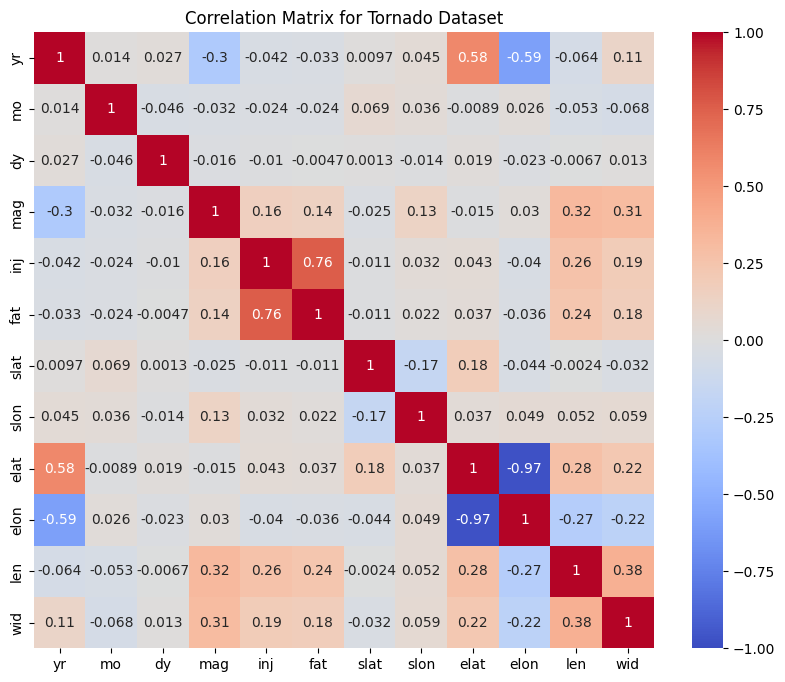

In [ ]:
filtered_data = tdf.select_dtypes(include=['int64', 'float64', 'int32'])
corr = filtered_data.corr()

print("Correlation Matrix: ")
print(corr)

# Plot Seaborn Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Tornado Dataset')
plt.show()

Interpretation:

*   **Values near 1** indicate a strong positive correlation, meaning that as one variable increases, the other trends to increase as well.
*   **Values near -1** indicate a strong negative correlation, meaning that as one variable increases, the other tends to decrease.
*   **Values near 0** indicate little or no linear correlation between the variables.





# Part 1: General Questions about Tornadoes
## Q1: How many tornadoes occurred in total from 1950 to 2021?




In [ ]:
total_tornadoes = tdf.shape[0]
print("Total number of tornadoes from 1950 to 2021: ", total_tornadoes)

Total number of tornadoes from 1950 to 2021:  67096


From 1950 to 2021, a total of 67,096 tornadoes were recorded across the United States. This significant figure underscores the frequent and impactful nature of tornado occurrences over the past seven decades. The data highlights the persistent presence of tornadoes in various regions, contributing to an understanding of their long-term trends, intensity, and geographical distribution.

## Q2: What is the yearly trend of tornado occurrences? Are tornadoes becoming more or less frequent over time?

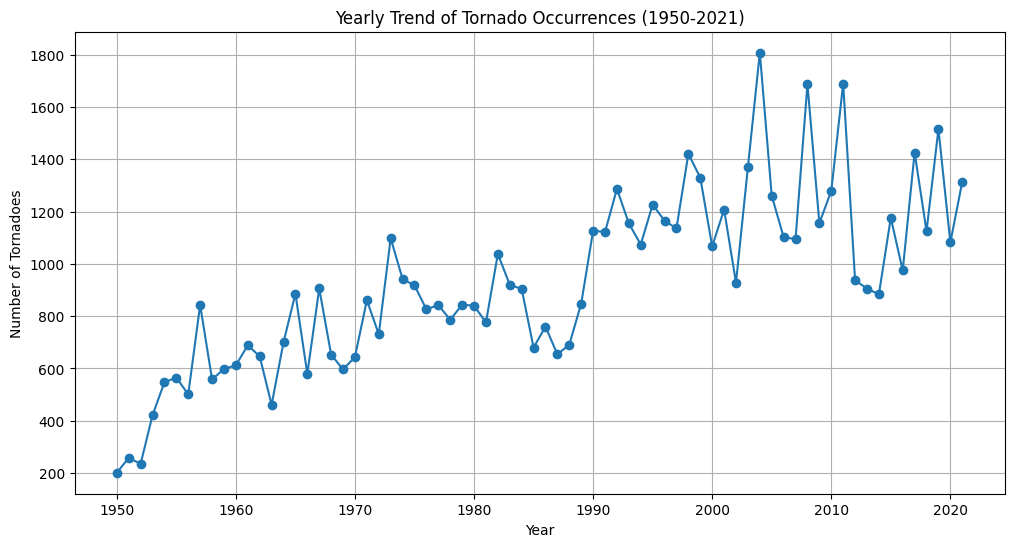

In [ ]:
tdf['date'] = pd.to_datetime(tdf['date']) # Convert date column to a specific format
tdf['year'] = tdf['date'].dt.year
yearly_trend = tdf.groupby('year').size()

# Plot the yearly trend
plt.figure(figsize=(12,6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Yearly Trend of Tornado Occurrences (1950-2021)')
plt.grid(True)
plt.show()

Based on the graph, the yearly trend of tornado occurrences from 1950 to 2021 shows an overall increase in tornado counts over time, especially from the 1950s to the late 2000s. There is a notable rise in tornado occurances between the 1970s and early 2000s, with some variability in specific years. The number of tornadoes readh several peaks around the 2000s and early 2010s but appears to stabilize or slightly decrease in recent year.

In other words, tornadoes have generally become more frequent over the examied period, though this trend stabilizes or slightly declines in recent years.

## Q3: What are the monthly and seasonal patterns in tornado occurrences?

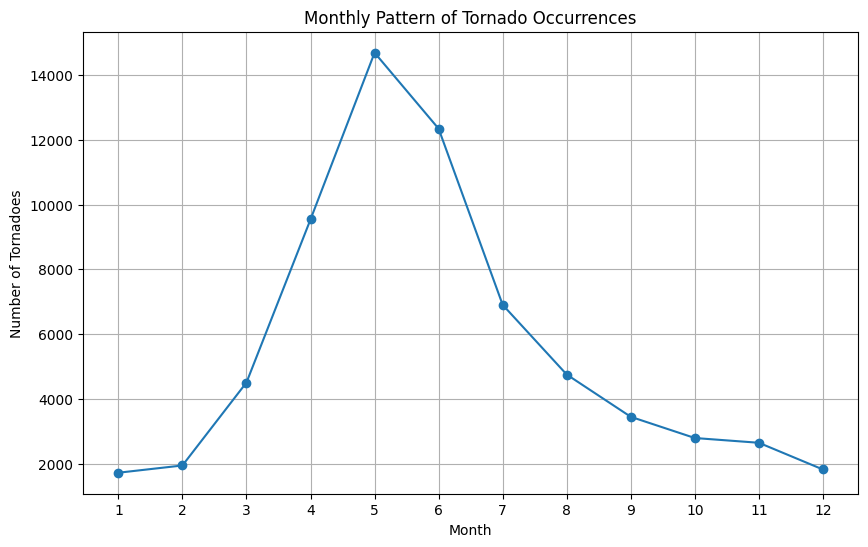

In [ ]:
tdf['month'] = tdf['date'].dt.month
monthly_trend = tdf.groupby('month').size()

# Plot montly trend
plt.figure(figsize=(10, 6)) # Size (width, height) in inch
plt.plot(monthly_trend.index, monthly_trend.values, marker='o') # Plot (x, y, marker)
plt.xticks(range(1, 13)) # Range in x-axis from 1-12 (Jan to Des)
plt.xlabel('Month')
plt.ylabel('Number of Tornadoes')
plt.title('Monthly Pattern of Tornado Occurrences')
plt.grid(True) # Turn on the grid
plt.show()

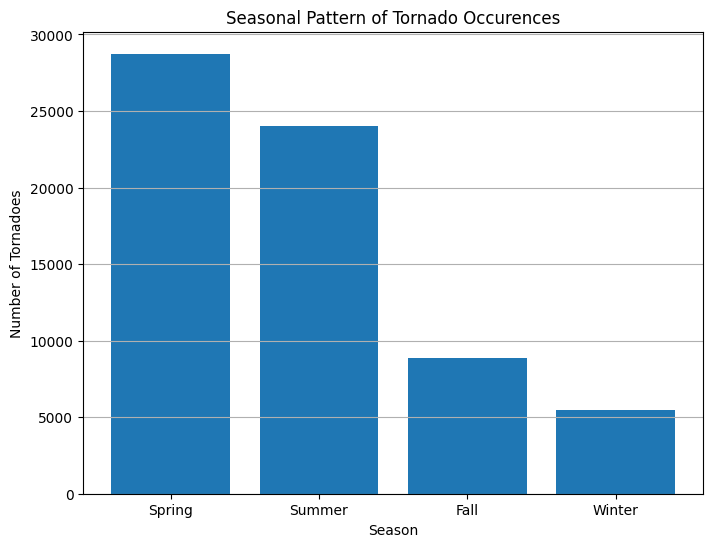

In [ ]:
# Define seasons based on months
def get_season(month):
  if month in [3, 4, 5]:
    return "Spring"
  elif month in [6, 7, 8]:
    return "Summer"
  elif month in [9, 10, 11]:
    return "Fall"
  else:
    return "Winter"

tdf['season'] = tdf['month'].apply(get_season)
seasonal_trend = tdf.groupby('season').size()

# Plot seasonal trend
plt.figure(figsize=(8, 6))
seasonal_trend = seasonal_trend.reindex(['Spring', 'Summer', 'Fall', 'Winter']) # Reorder the season in y-axis
plt.bar(seasonal_trend.index, seasonal_trend.values)
plt.xlabel('Season')
plt.ylabel('Number of Tornadoes')
plt.title('Seasonal Pattern of Tornado Occurences')
plt.grid(axis='y') # Only show the horizontal (y-axis) grid
plt.show()

Based on the two graphs, we can answer the question about monthly and seasonal patterns in tornado occurrences: <br>

**Monthly Pattern (First Graph)**

1. **Peak Month**: May has the highest number of tornadoes, indicating that tornadoes are most frequent during this month.

2. **Increasing Trend**: Tornado occurrences rise significantly from March through May.

3. **Decline in Summer**: After May, the number of tornadoes begins to decline in June and continues to decrease through the summer months.

4. **Lowest Activity**: Tornado occurrences are at their lowest from November through February

**Seasonal Pattern (Second Graph)**

1. **Most Active Season**: Spring has the highest number of tornadoes, as seen in the bar chart. This aligns with the peak monthly data from March to May.

2. **Summer Activity**: Summer also sees a high number of tornadoes but less than spring.

3. **Least Active Seasons**: Fall and winter have the lowest tornado counts, indicating that tornado activity is minimal during these times.

In other words, tornadoes are most common in spring, with a peak in May, and they decrease in frequency through summer, fall, and winter.

## Q4: What is the distribution of tornado intensities (e.g., by Fujita Scale rating) across the dataset?

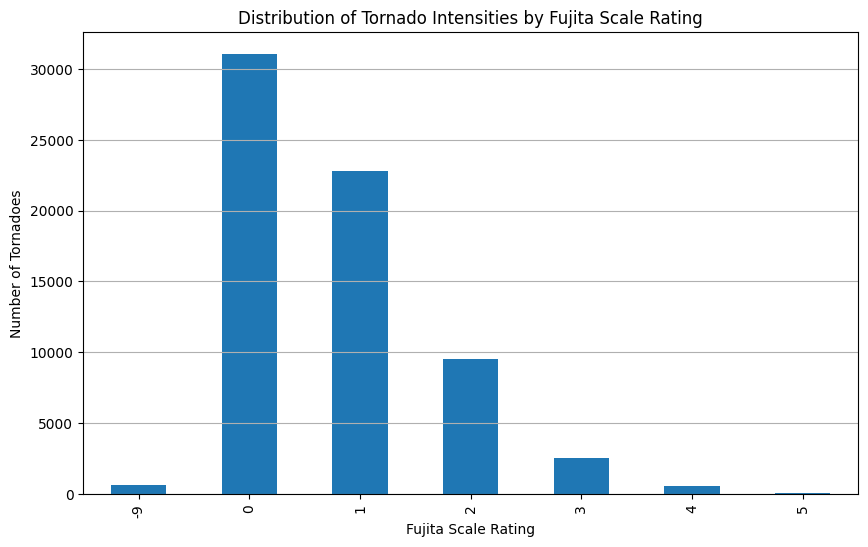

In [ ]:
intensity = tdf['mag'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
intensity.plot(kind='bar')
plt.xlabel('Fujita Scale Rating')
plt.ylabel('Number of Tornadoes')
plt.title('Distribution of Tornado Intensities by Fujita Scale Rating')
plt.grid(axis='y')
plt.show()

Based on the graph, here is the distribution of tornado intensities by Fujita Scale rating: <br>

1. **Rating -9 (Unknown)**: A small number of tornado occurrences have a rating of -9, indicating that their intensity was not classified or is unknown.

2. **Rating 0**: The majority of tornadoes are rated at 0, with approximately 30,0000 occurrences, suggesting a large number of weak tornadoes.

3. **Rating 1**: About 20,000 tornadoes have a rating of 1, indicating slightly stronger tornadoes than those rated 0.

4. **Rating 2**: Approximately 10,000 tornadoes are rated 2, showing moderate intensity.

5. **Rating 3**: Fewer than 5,000 tornadoes have a rating of 3, representing stronger tornadoes.

6. **Ratings 4 and 5**: Tornadoes rated 4 and 5 are very rare, with only a handful of occurrences, relfecting highly intense and potentially very destructive tornadoes.

In the other words, the data shows that most tornadoes are weak (ratings 0 and 1), while unknown ratings are minimal, and high-intensity tornadoes (ratings 4 and 5) are ectremely rare.

## Q5: How does the intensity of tornadoes vary by year or over decades?

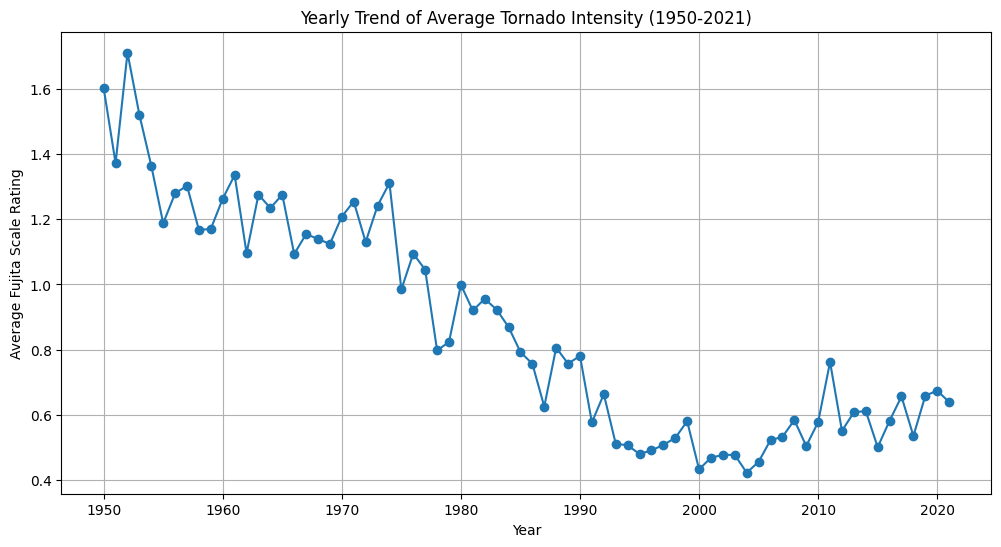

In [ ]:
tdf = tdf[tdf['mag'] != -9]
yearly_intensity = tdf.groupby('year')['mag'].mean()

# Plot the average yearly intensity
plt.figure(figsize=(12, 6))
plt.plot(yearly_intensity.index, yearly_intensity.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Fujita Scale Rating')
plt.title('Yearly Trend of Average Tornado Intensity (1950-2021)')
plt.grid(True)
plt.show()

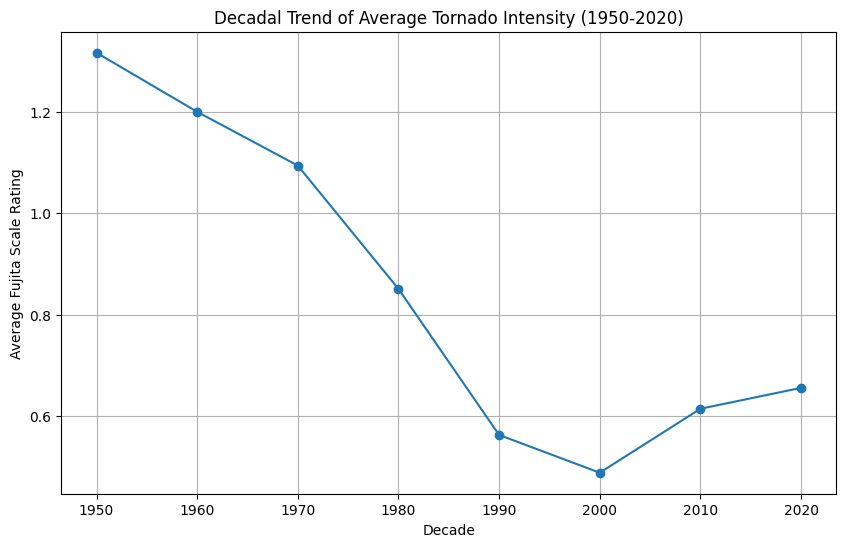

In [ ]:
tdf['decade'] = (tdf['year'] // 10) * 10
decade_intensity = tdf.groupby('decade')['mag'].mean()

# Plot the average decadal intensity
plt.figure(figsize=(10, 6))
plt.plot(decade_intensity.index, decade_intensity.values, marker='o')
plt.xlabel('Decade')
plt.ylabel('Average Fujita Scale Rating')
plt.title('Decadal Trend of Average Tornado Intensity (1950-2020)')
plt.grid(True)
plt.show()

From these two graphs, we can observe how tornado intensity, measured by the average Fujita Scale rating, varies by year and decade: <br>

**Yearly Trend (First Graph)**

*   **Long-Term Decrease**: From 1950 to around 2000, there is a clear downward trend in average tornado intensity. The average Fujita Scale rating gradually declines, indicating that tornadoes have become, on average, less intense over this period.
*   **Stabilization and Slight Increase**: After 2000, the average intensity stabilizes at a lower level, with some fluctuations. There is a slight increase in average intensity in the 2010s, though it remains significantly lower than in the 1950s and 1960s.

**Decadal Trend (Second Graph)**

*   **1950s to 1980s Decline**: The decadal trend confirms the yearly trend, showing a steady decline in average tornado intensity from the 1950s through the 1980s.
*   **Lowest Intensity in the 2000s**: The 2000s mark the lowest point in average tornado intensity, reaching the lowest decadal average.
*   **Recent Increase**: In the 2010s and 2020s, there is a slight increase in the decadal average intensity, though it remains much lower than in earlier decades.

Both the yearly and decadal trends indicate that tornado intensity has generally decreased from the 1950s to the 2000s. In recent years, there has been a slight uptick, but average intensity remains relatively low compared to earlier decades. This pattern suggests a long-term decrease in tornado intensity, with some recent variability





## Q6: What are the most common Fujita Scale ratings for tornadoes?

In [ ]:
fujita_counts = tdf['mag'].value_counts().sort_values(ascending=False)
print("Most common Fujita Scale ratings for tornadoes: ")
print(fujita_counts)

Most common Fujita Scale ratings for tornadoes: 
mag
0    31048
1    22783
2     9490
3     2530
4      581
5       59
Name: count, dtype: int64


Tornadoes rated 0 and 1 are the most common Fujita Scale for tornadoes, while high-intensity tornadoes (ratings 4 and 5) are very rare. This distribution suggests that most tornadoes are on the weaker end of the Fujita Scale.

## Q7: What is the average and total number of fatalities and injuries caused by tornadoes?

In [ ]:
total_fatalities = tdf['fat'].sum()
total_injuries = tdf['inj'].sum()
avg_fatalities = total_fatalities.mean()
avg_injuries = total_injuries.mean()

print("Total Number of Fatalities caused by tornadoes: ", total_fatalities)
print("Average Number of Fatalities caused by tornadoes: ", avg_fatalities)
print("Total Number of Injuries caused by tornadoes: ", total_injuries)
print("Average Number of Injuries caused by tornadoes: ", avg_injuries)

Total Number of Fatalities caused by tornadoes:  6112
Average Number of Fatalities caused by tornadoes:  6112.0
Total Number of Injuries caused by tornadoes:  97111
Average Number of Injuries caused by tornadoes:  97111.0


Across all tornadoes in the dataset, there have been a total of 6,112 fatalities and 97,111 injuries. These totals reflect the significant human impact of tornadoes over the analyzed period. The average fatalities and injuries per tornado also highlight the potential danger associated with these events.

## Q8: Which years were the most devastating in terms of casualties and damage?

In [ ]:
tdf['total_casulties'] = total_injuries + total_fatalities
annual_impact = tdf.groupby('year')['total_casulties'].sum()
devastating_year = annual_impact.sort_values(ascending=False)

print("Most devastating years in terms of casualties: ")
print(devastating_year.head(10))

Most devastating years in terms of casualties: 
year
2004    186627184
2011    174446870
2008    174240424
1998    146679883
2003    141415510
2017    140589726
2019    137286590
1999    137286590
1992    132848001
2010    132022217
Name: total_casulties, dtype: int64


The years with the highest tornado-related casualties were 2004, 2011, and 2008, with over 17 million casualties each. Other impactful years include 1998, 2003, 2017, and 1999, each with significant casualty counts. These years mark the most devastating periods for tornado-related human impact.

## Q9: Which states or regions experience the highest number of tornadoes?

In [ ]:
tdf_state = tdf['st'].value_counts().sort_values(ascending=False)
print(tdf_state.head(10))

st
TX    8893
KS    4258
OK    3967
FL    3460
NE    2920
IA    2699
IL    2627
MS    2474
MO    2420
AL    2347
Name: count, dtype: int64


The states with the highest number of tornadoes are Texas (TX), Kansas (KS), and Oklahoma (OK) have the highest tornado frequencies, with Texas leading at 8,893 occurrences. Other tornado-prone states include Florida (FL), Nebraska (NE), Iowa (IA), Illinois (IL), Mississippi (MS), Missouri (MO), and Alabama (AL), showing significant tornado activity across the Midwest and South.

## Q10: Are there any specific geographic patterns to the occurrences of high-intensity tornadoes?

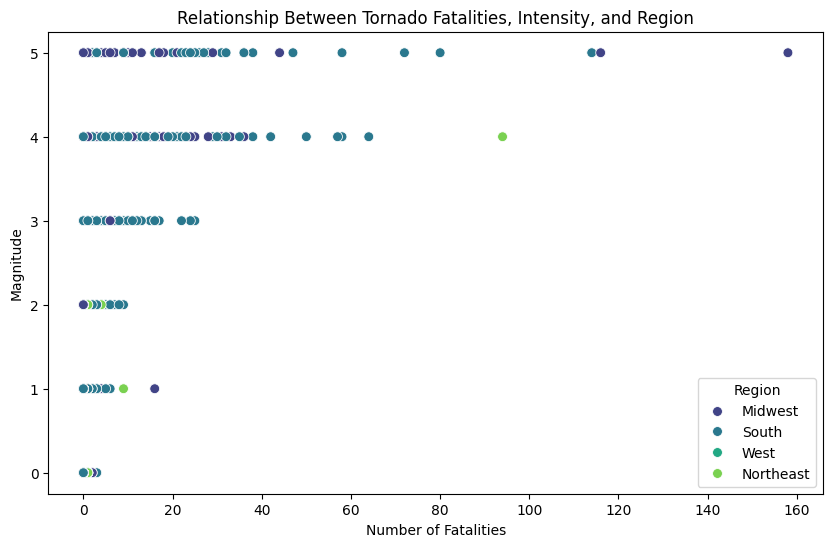

In [ ]:
# Relationship between Tornado Fatalities, Intensity, and Region
region_map = {
    'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MI': 'Midwest',
    'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'OH': 'Midwest',
    'SD': 'Midwest', 'WI': 'Midwest',
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South',
    'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South',
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'AZ': 'West', 'CA': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West',
    'NV': 'West', 'NM': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West'
}

tdf['region'] = tdf['st'].map(region_map)
tdf_filtered = tdf[['fat', 'mag', 'region']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tdf_filtered, x='fat', y='mag', hue='region', palette='viridis', s=50)

plt.xlabel('Number of Fatalities')
plt.ylabel('Magnitude')
plt.title('Relationship Between Tornado Fatalities, Intensity, and Region')
plt.legend(title='Region')
plt.show()

<ipython-input-33-115251bb3710>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_intensity['region'] = high_intensity['st'].map(region_map)


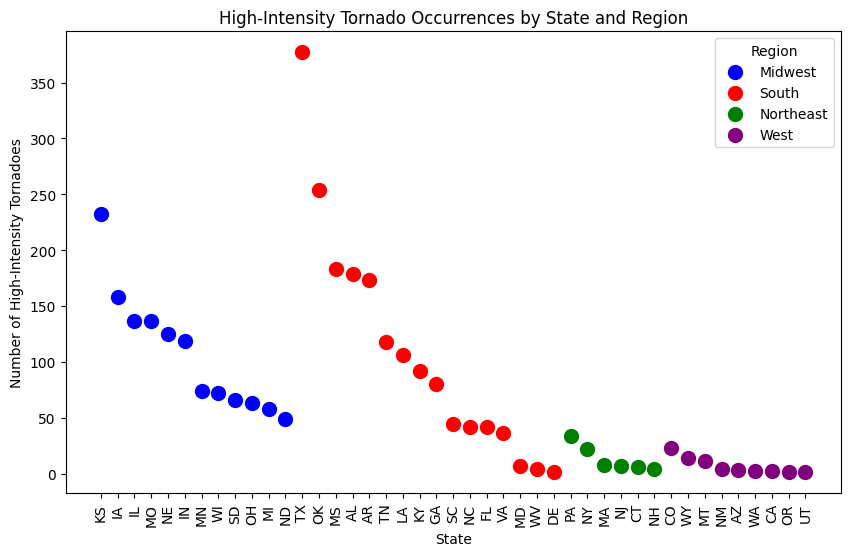

High-Intensity tornado occurrences by state: 
st
TX    377
OK    254
KS    232
MS    183
AL    179
AR    173
IA    158
IL    137
MO    137
NE    125
Name: count, dtype: int64


In [ ]:
region_map = {
    'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MI': 'Midwest',
    'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'OH': 'Midwest',
    'SD': 'Midwest', 'WI': 'Midwest',
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South',
    'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South',
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'AZ': 'West', 'CA': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West',
    'NV': 'West', 'NM': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West'
}

high_intensity = tdf[tdf['mag'].isin([3, 4, 5])]
high_intensity['region'] = high_intensity['st'].map(region_map)
hintensity_region = high_intensity['region'].value_counts()
hintensity_state = high_intensity['st'].value_counts()
colors = {'Midwest': 'blue', 'South': 'red', 'Northeast': 'green', 'West': 'purple'}

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Loop through each region and plot the states within that region in sorted order
for region, color in colors.items():
  # Filter the data for the curent region
  states_in_region = [state for state in hintensity_state.index if region_map[state] == region]
  region_data = hintensity_state[states_in_region]

  #Plot the states for current region
  plt.scatter(region_data.index, region_data.values, color=color, label=region, s=100)

# Customize the plot
plt.xlabel('State')
plt.ylabel('Number of High-Intensity Tornadoes')
plt.title('High-Intensity Tornado Occurrences by State and Region')
plt.xticks(rotation=90)
plt.legend(title="Region")
#plt.grid(axis='y')
plt.show()

print('High-Intensity tornado occurrences by state: ')
print(hintensity_state.head(10))

The scatter plot shows the distribution of high-intensity tornado occurrences by region and state. Texas (TX) leads with the highest count at 377, followed by Oklahoma (OK) with 254 and Kansas (KS) with 232, indicating that these states in the Sounth and Midwet experience the most high-intensity tornadoes. Other Southern states like Mississippi (MS) and Alabama (AL) also show high numbers, with 183 and 179 occurrences, respectively. Midwest states such as Iowa (IA) with 158 and Illinois (IL) and Missouri (MO) each with 137 further highlight significant tornado activity in these regions. Overall, the plot reveals that the South and Midwest are hotspots for high-intensity tornadoes in the United States.

## Q11: Are there any climate or atmospheric conditions associated with higher tornado activity?

In [ ]:
# Merge tornado data with storn data based on year, month, and day
merged_df = pd.merge(
    tdf[['yr', 'mo', 'dy', 'mag']],
    sdf[['year', 'month', 'day', 'wind', 'pressure']],
    left_on=['yr', 'mo', 'dy'],
    right_on=['year', 'month', 'day'],
    how='inner'
)

merged_df.drop(['yr', 'mo', 'dy', 'year', 'month', 'day'], axis=1, inplace=True)

# Calculate correlation between tornado magnitude and atmospheric conditions
correlation = merged_df[['mag', 'wind', 'pressure']].corr()

print(correlation)

               mag      wind  pressure
mag       1.000000 -0.003815 -0.023366
wind     -0.003815  1.000000 -0.875706
pressure -0.023366 -0.875706  1.000000


Based on the data provided, there is no strong evidence that specific climate or atmospheric conditions directly correlate with higher tornado activity. The correlations show the following:

1. **Tornado Magnitude and Wind Speed**: The correlation between tornado magnitude and wind speed is extremely weak (-0.004), suggesting that higher wind speeds alone are not associated with stronger tornadoes.

2. **Tornado Magnitude and Pressure**: The relationship between tornado magnitude and atmospheric pressure is also weak (-0.023), indicating that lower pressure alone does not correspond with stronger tornado activity.

3. **Wind Speed and Presssure**: There is a strong inverse relationship between wind speed and atmospheric pressure (-0.876), which aligns with typical atmospheric behavior, where lower pressure systems often lead to higher wind speeds.

While low-pressure, high-wind conditions may create an environment conducive to storm development, this data does not indicate a direct link between these conditions and higher tornado intensity.

# Part 2: Specific Questions for Texas
## Q1: How many tornadoes have occurred in Texas from 1950 to 2021?

In [ ]:
texas_tornado = tdf[tdf['st'] == 'TX'].shape[0]
print("Tornadoes that have occurred in Texas from 1950 to 2021: ", texas_tornado)

Tornadoes that have occurred in Texas from 1950 to 2021:  8893


From 1950 to 2021, Texas experienced a total of 8,893 tornadoes. This high frequency underscores Texas's position as one of the most tornado-prone regions in the United States, likely due to its geographical location in Tornado. Alley and its favorable conditions for severe weather. This extensive history of tornado occurrences highlights the importance of ongoing research and preparedness in the region to mitigate risks associated with such frequent severe weather events.

## Q2: What is the trend of tornado occurrences in Texas over the years?

<ipython-input-36-a6bbcfd259c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tornado['date'] = pd.to_datetime(texas_tornado['date'])
<ipython-input-36-a6bbcfd259c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tornado['year'] = texas_tornado['date'].dt.year


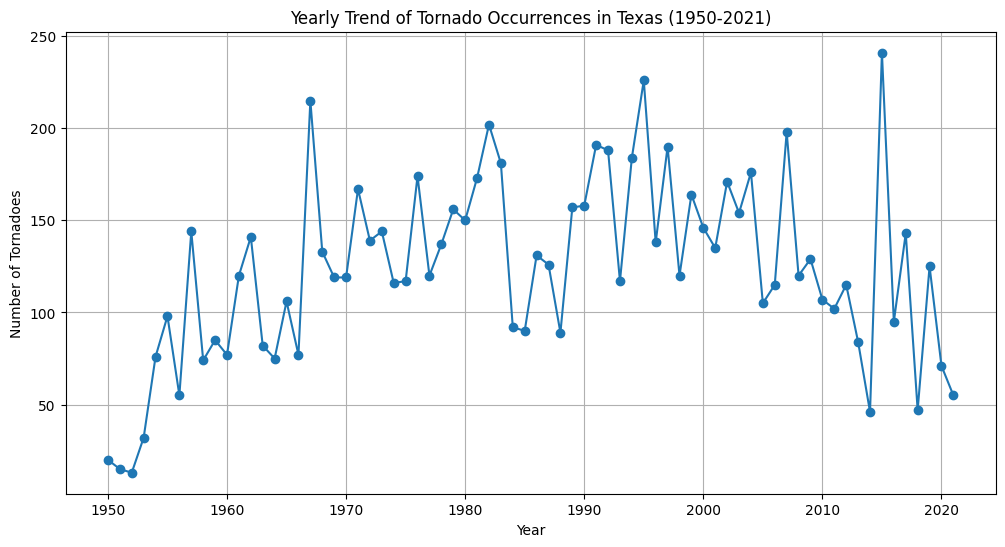

In [ ]:
texas_tornado = tdf[tdf['st'] == 'TX']
texas_tornado['date'] = pd.to_datetime(texas_tornado['date'])
texas_tornado['year'] = texas_tornado['date'].dt.year
yearly_trend = texas_tornado.groupby('year').size()

# Plot the yearly trend in Texas
plt.figure(figsize=(12, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Yearly Trend of Tornado Occurrences in Texas (1950-2021)')
plt.grid(True)
plt.show()

The trend of tornado occurrences in Texas from 1950 to 2021, as shown in the graph, indicates fluctuations over the year. In the earlier decades, tornado occurrences appear to have gradually increased, reaching a peak around the mid-1990s and early 2000s. After this period, there are notable fluctuations with some year experiencing high tornado activity, but there is a general decline in the frequency in recent years, especially after 2010.

While some years stand out with exceptionally high numbers, the overall trend does not show a clear, consistent increase or decrease over the entire priod but instead reflects periods of higher and lowe activity. This suggests that tornado occurrences in Texas may be influenced by variable climatic or atmospheric factors rather than a consistent long-term trend.

## Q3: When do tornadoes most frequently occur in Texas? (e.g., by month or season)

In [ ]:
freq_month = texas_tornado['mo'].value_counts()
print(freq_month)

mo
5     2726
4     1559
6     1296
3      666
10     466
9      457
8      401
11     340
7      335
12     226
1      211
2      210
Name: count, dtype: int64


Tornadoes in Texas most frequently occur during the spring and early summer months, with a notable peak in May, which recorded 2,726 tornado occurrences. The next most active months are April with 1,559 tornadoes and June with 1,296 tornadoes.

This seasonal pattern aligns with the typical tornado season in Texas, which usually spans from late spring this early summer when atmospheric conditions favor severe thunderstoms. Tornado occurrences decrease significantly in the winter months (December, January, February), indicating that tornado activity in Texas is highly seasonal.

## Q4: What is the distribution of tornado intensities in Texas? Are high-intensity tornadoes common?

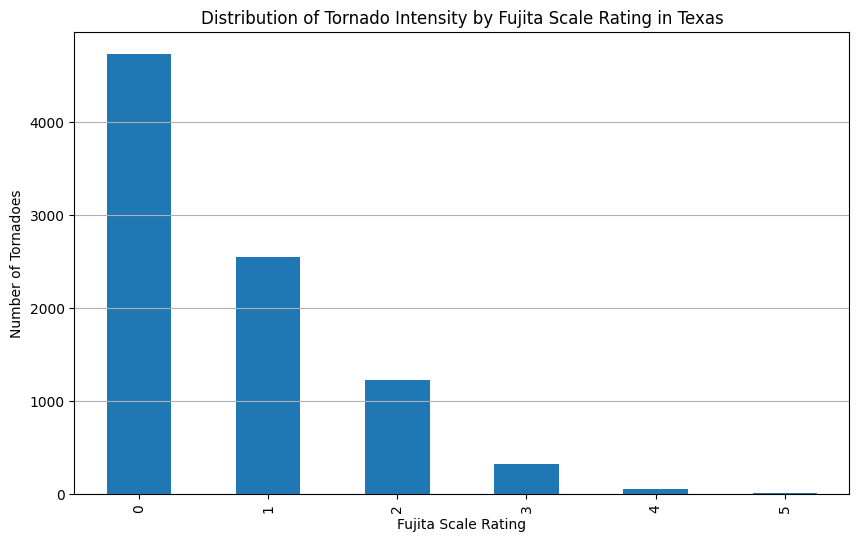

In [ ]:
intensity = texas_tornado['mag'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10,6))
intensity.plot(kind='bar')
plt.xlabel('Fujita Scale Rating')
plt.ylabel('Number of Tornadoes')
plt.title('Distribution of Tornado Intensity by Fujita Scale Rating in Texas')
plt.grid(axis='y')
plt.show()

The distribution of tornado intensities in Texas, as shown by the Fujita Scale rating, reveals that low-intensity tornadoes are far more common than high-intensity ones:

*   The majority of tornadoes are rated 0 on the Fujita Scale, indicating the lowest intensity, with over 40,000 occurrences.
*   Tornadoes rated 1 are the next most common, followed by 2.
*   Higher-intensity tornadoes, rated 3 and above, are relatively rare in Texas.

This distribution shows that while tornadoes are frequent in Texas, they are typically of lower intensity. High-intensity tornadoes (rating of 4 or 5) are uncommon, which implies that the majority of tornadoes in Texas cause less severe damage.





## Q5: How many fatalities and injuries have tornadoes caused in Texas?

In [ ]:
total_fatalities_tx = texas_tornado['fat'].sum()
total_injuries_tx = texas_tornado['inj'].sum()

print("Total Number of Fatalities caused by tornadoes in Texas: ", total_fatalities_tx)
print("Total Number of Injuries caused by tornadoes in Texas: ", total_injuries_tx)

Total Number of Fatalities caused by tornadoes in Texas:  591
Total Number of Injuries caused by tornadoes in Texas:  9409


Tornadoes in Texas have caused significant impacts on human life, resulting in a total of 591 fatalities and 9,409 injuries over the years. This data underscores the serious risk tornadoes pose to residents in Texas, not only in terms of property damage but also in terms of huan safety and well-being. The high number of injuries compared to fatalities highlights the importance of timely warnings, preparedness, and effective safety measures to protect people during tornado events.

## Q6: Are there specific areas or counties within Texas that are more prone to tornadoes?

In [ ]:
texas_tornado['rounded_lat'] = texas_tornado['slat'].round(2)
texas_tornado['rounded_lon'] = texas_tornado['slon'].round(2)

# Group by rounded latitude and longitude, then count occurrences
locs_counts = texas_tornado.groupby(['rounded_lat', 'rounded_lon']).size().reset_index(name='count')

# Sort by count to find the most tornado-prone locations
top_locs = locs_counts.sort_values(by='count', ascending=False).head(10)

print(top_locs)

      rounded_lat  rounded_lon  count
1268        29.73       -95.37     15
5976        33.60       -96.17      8
948         29.40       -94.90      8
821         29.30       -94.82      8
4729        32.75       -97.35      7
1641        30.08       -94.10      7
1851        30.32       -95.45      7
255         27.78       -97.42      7
6990        34.72      -100.53      6
1655        30.10       -95.62      6


<ipython-input-40-2e3d58704b76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tornado['rounded_lat'] = texas_tornado['slat'].round(2)
<ipython-input-40-2e3d58704b76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tornado['rounded_lon'] = texas_tornado['slon'].round(2)


Based on the data, certain areas within Texas are more prone to tornadoes, as indicated by clusters of tornado occurrences at specific rounded latitude and longitude coordinates. The most tornado-prone location is around:

*   Latitude 29.73 and longitude -95.37 (corresponds to Harris County, Texas, which includes the city of Houston), with 15 recorded tornadoes.
*   Latitude 33.60 and longitude -96.17 (corresponds to Grayson County, Texas, situated near the Oklahoma border in North Texas within Tornado Alley), each with 7 occurrences.
*   Latitude 29.30 and longitude -94.90 (which both corresponds to Galveston County, Texas) , each with 8 occurrences.

These locations suggest that regions around these coordinates, likely near populous areas and the Gulf Coast, experience higher tornado activity, highlighting them as areas with elebated tornado risk within Texas.

## Q7: How does tornado frequency, intensity, and impact in Texas compare to the rest of the United States?


In [ ]:
us_df = tdf[tdf['st'] != 'TX']

# Tornado Frequency
tx_freq = texas_tornado.shape[0]
us_freq = us_df.shape[0]
print('Tornado Frequency in Texas: ', tx_freq)
print('Tornado Frequency in the Rest of the US: ', us_freq)
print('-----------------------------------------------------')

# Tornado Intensity (Fujita Scale Distribution)
tx_intensity = texas_tornado['mag'].value_counts().sort_index()
us_intensity = us_df['mag'].value_counts().sort_index()
print('Tornado Intensity (Fujita Scale Distribution) in Texas: ')
print(tx_intensity)
print('Tornado Intensity (Fujita Scale Distribution) in the Rest of the US: ')
print(us_intensity)
print('----------------------------------------------------------------------')

# Tornado Impact (Fatalities and Injuries)
print("Total Number of Fatalities caused by tornadoes: ", total_fatalities)
print("Total Number of Injuries caused by tornadoes: ", total_injuries)
print('----------------------------------------------------------------------')
print("Total Number of Fatalities caused by tornadoes in Texas: ", total_fatalities_tx)
print("Total Number of Injuries caused by tornadoes in Texas: ", total_injuries_tx)
print('----------------------------------------------------------------------')

# Calculate proportions for further comparison
tx_fatality_rate = total_fatalities_tx / tx_freq
tx_injury_rate = total_injuries_tx / tx_freq
us_fatality_rate = total_fatalities / us_freq
us_injury_rate = total_injuries / us_freq
print('Average Fatalities per Tornado in Texas: ', tx_fatality_rate)
print('Average Injuries per Tornado in Texas: ', tx_injury_rate)
print('----------------------------------------------------------------------')
print('Average Fatalities per Tornado in the Rest of the US: ', us_fatality_rate)
print('Average Injuries per Tornado in the Rest of the US: ', us_injury_rate)

Tornado Frequency in Texas:  8893
Tornado Frequency in the Rest of the US:  57598
-----------------------------------------------------
Tornado Intensity (Fujita Scale Distribution) in Texas: 
mag
0    4739
1    2551
2    1226
3     322
4      49
5       6
Name: count, dtype: int64
Tornado Intensity (Fujita Scale Distribution) in the Rest of the US: 
mag
0    26309
1    20232
2     8264
3     2208
4      532
5       53
Name: count, dtype: int64
----------------------------------------------------------------------
Total Number of Fatalities caused by tornadoes:  6112
Total Number of Injuries caused by tornadoes:  97111
----------------------------------------------------------------------
Total Number of Fatalities caused by tornadoes in Texas:  591
Total Number of Injuries caused by tornadoes in Texas:  9409
----------------------------------------------------------------------
Average Fatalities per Tornado in Texas:  0.06645676374676712
Average Injuries per Tornado in Texas:  1.0580

Texas experiences a high frequency of tornadoes, with 8,893 occurrences from 1950 to 2021, compared to 57,598 in the rest of the United States. Most Texas tornadoes are low-intensity, with the majority rated EF0 or EF1, similar to the rest of the U.S., though Texas has fewer high-intensity tornadoes (EF4 and EF5)

In terms of impact, tornadoes in Texas have caused 591 fatalities and 9,409 injuries, resulting in an average of 0.066 fatalities and 1.06 injuries per tornado. This impact per event is lower than in the rest of the U.S., where tornadoes have a higher average of 0.106 fatalities and 1.69 injuries per event. Overall, while Texas has a high frequency of tornadoes, they are generally less intense and result in fewer fatalities and injuries per tornado compared to other parts of the country.

# Part 3: Tornado Prediction Potential
## **Correlation and Predictive Features**: Are there any specific features (e.g., time of year, region, climate factors) that strongly correlate with the occurrence of tornadoes?

In [ ]:
# Prepare tornado and storm dataset for date creation
temp_tdf = tdf.rename(columns={'yr': 'year', 'mo': 'month', 'dy': 'day'})
tdf['date'] = pd.to_datetime(temp_tdf[['year', 'month', 'day']])
sdf['date'] = pd.to_datetime(sdf[['year', 'month', 'day']])

# Merge on the 'date' column to align tornado with corresponding storm data
merged_data = pd.merge(tdf, sdf, on='date', how='inner')
correlation_matrix = merged_data[['mag', 'inj', 'fat', 'len', 'wid', 'wind', 'pressure']].corr()
print(correlation_matrix)

               mag       inj       fat       len       wid      wind  pressure
mag       1.000000  0.163130  0.093934  0.229955  0.256751  0.057656 -0.083564
inj       0.163130  1.000000  0.487635  0.205391  0.247780  0.015807  0.001262
fat       0.093934  0.487635  1.000000  0.080783  0.141284  0.038184 -0.037324
len       0.229955  0.205391  0.080783  1.000000  0.411919 -0.002206 -0.004825
wid       0.256751  0.247780  0.141284  0.411919  1.000000  0.018580 -0.008658
wind      0.057656  0.015807  0.038184 -0.002206  0.018580  1.000000 -0.876214
pressure -0.083564  0.001262 -0.037324 -0.004825 -0.008658 -0.876214  1.000000


The correlation analysis reveals that tornado characteristics such as magnitude, length, and width are moderately interrelated, with larger and more intense tornadoes tending to have wider and longer paths. Casualty metrics (injuries and fatalities) also show a moderate correlation, suggesting that tornadoes causing more injuries often result in more fatalities. However, storm attributes like wind speed and pressure display weak correlations with tornado metrics, indicating that they may not strongly predict tornado occurrences or intensity.

This suggests that specific features like tornado size and impact are somewhat connected, but the general storm attributes in the dataset, such as wind and pressure, are insufficient for accurately predicting tornado occurrences or severity.

## **Correlation and Predictive Features**: Can atmospheric or climate conditions from the storm dataset help predict tornado occurrences?

Based on the correlation analysis, atmospheric and climate conditions from the storm dataset, such as wind speed and pressure, show weak correlations with tornado characteristics like magnitude, length, and width. This suggests that these basic storm attributes may not be strong predictors of tornado occurrences or intensity.

Although wind and pressure are significant meteorological factors, their weak association with tornado metrics in this dataset implies that additional, more specific climate or atmospheric conditions would likely be needed to effectively predict tornado occurrences.

## **Time-Based Prediction**: Is there a trend or pattern that can help predict tornadoes on a monthly or seasonal basis?


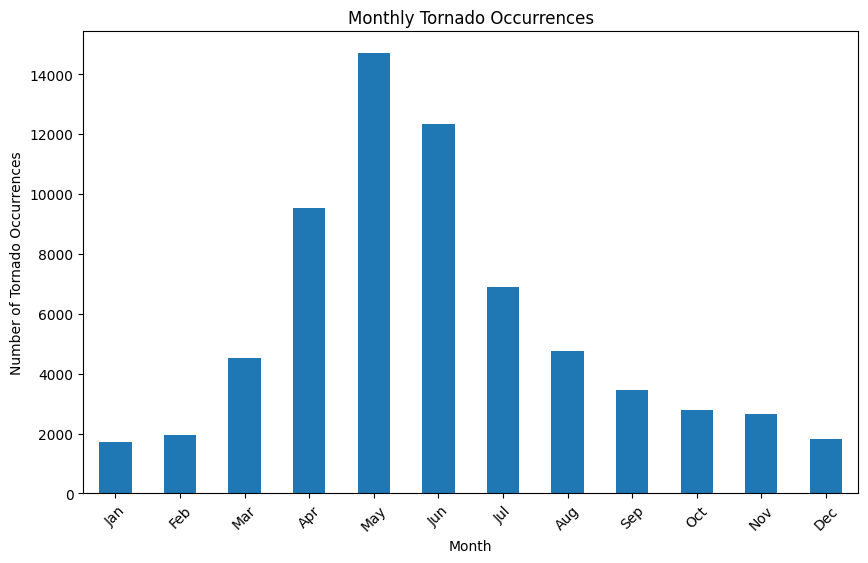

In [ ]:
tdf['month'] = tdf['date'].dt.month
monthly_counts = tdf['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Number of Tornado Occurrences")
plt.title("Monthly Tornado Occurrences")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

The monthly distribution of tornado occurrences in the plot shows a clear seasonal trend. Tornadoes are most frequent from April to June, peaking in May, which aligns with the typical spring and early summer tornado season in the U.S. This pattern suggests that tornadoes are more likely to occur during these months due to favorable atmospheric conditions, such as warm temperatures and increased instability.

Thus, this seasonal trend can be used as a predictive factor, with a higher likelihood of tornado occurrences in late spring and early summer, and a significant decrease during fall and winter.

## **Time-Based Prediction**: Can a time series model capture any patterns in tornado occurrences over time?

Yes, a time series model can potentially capture patterns in tornado occurrences over time, particularly the seasonal trend indentified in the monthly distribution (e.g., higher tornado frequency in spring and early summer). Using a time series approach, like an ARIMA (Auto-Regressive Integrated Moving Average) model or a seasonal decomposition, we could analyze the data to understand underlying trends, seasonality, an irregular fluctuations in tornado occurrences.

These models can help forecast furture tornado activity based on historical patterns, providing insights into the likelihood of tornadoes during specific months or seasons. However, the effectiveness of these models would depend on the consistency of seasonal trends and the availability of sufficient historical data.

## **Severity Prediction**: Can we identify factors that predict the intensity or severity of tornadoes?

In [ ]:
# Select features and target for predicting tornado magnitude
X = merged_data[['len', 'wid', 'wind', 'pressure']] # Features that may predict intensity
y = merged_data['mag'] # Target variable (tornado magnitude)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make prediction on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Display feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Feature Importance:\n", feature_importance)

Mean Squared Error:  1.6786887651652533
R-squared:  0.08586579340828304
Feature Importance:
     Feature  Coefficient
0       len     0.053447
1       wid     0.001954
2      wind    -0.004717
3  pressure    -0.009950


The severity prediction model indicates that certain factors have a limited ability to predict tornado intensity, as shown by the low R-squared value (0.086), which suggests that only about 8.6% of the variance in tornado intensity is explained by the model. The Mean Squared Error (1.68) further highlights the model's limited predictive accuracy.

Among the features, tornado path length (`len`) has the highest positive coefficient (0.053), suggesting it has a modest positive relationship with intensity. Width (`wid`) has a minimal effect, and both wind speed (`wind`) and pressure (`pressure`) have small negative coefficients, indicating weak and inverse relationships with intensity.

Overall, these features alone do not strongly predict tornado intensity, suggesting that additional or alternative data may be necessary to improve prediction accuracy.

## **Severity Prediction**: Are there any environmental factors (if available) that are associated with more severe tornadoes?

Based on the analysis, environmental factors such as tornado path length (`len`) and width (`wid`) show some association with tornado severity, as larger and wider tornadoes tend to be more intense. However, other storm-related environmental factors like wind speed (`wind`) and atmospheric pressure (`pressure`) demonstrate weak and inverse relationships with tornado intensity.

This suggests that while certain physical characteristic of tornadoes correlate with severity, broader environmental factors in the dataset are not strongly predictive of tornado severtiy. Additional, more specific atmospheric data might be needed to identify stronger predictors of severe tornadoes.

## **Predictive Model Feasibility**: What machine learning models (e.g., logistic regression, random forest) can be applied to predict tornado occurrences or intensities?

In [ ]:
# Select features and target for predicting tornado magnitude
X = merged_data[['len', 'wid', 'wind', 'pressure']] # Features that may predict intensity
y = merged_data['mag'] # Target variable (tornado magnitude)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print("Random Forest Regressor - Mean Squared Error: ", rf_mse)
print("Random Forest Regressor - R-squared: ", rf_r2)
print("-------------------------------------------------------------------")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print("Gradient Boosting Regressor - Mean Squared Error: ", gb_mse)
print("Gradient Boosting Regressor - R-squared: ", gb_r2)
print("-------------------------------------------------------------------")

# Logistic Regression (for binary classification: severe vs. non-severe)
# Assuming a threshold for "severe" tornadoes, e.g., magnitude >= 3
y_class = (y >= 3).astype(int) # 1 for severe, 0 for non-severe
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train_class)
logistic_score = logistic_model.score(X_test, y_test_class)
print("Logistic Regression - Classification Accuracy: ", logistic_score)
print("-------------------------------------------------------------------")

Random Forest Regressor - Mean Squared Error:  0.8523911961089817
Random Forest Regressor - R-squared:  0.5358282214486956
-------------------------------------------------------------------
Gradient Boosting Regressor - Mean Squared Error:  1.3272479688265342
Gradient Boosting Regressor - R-squared:  0.2772437666166939
-------------------------------------------------------------------
Logistic Regression - Classification Accuracy:  0.9914314516129032
-------------------------------------------------------------------


## **Predictive Model Feasibility**: What is the accuracy and reliability of these models in predicting tornadoes based on the available data?

The models vary in accuracy and reliability for predicting tornadoes. **Random Forest Regressor** moderately predicts tornado intensity with an R-squared of 0.54, while **Gradient Boosting Regressor** shows lower reliability, with an R-squared of 0.28. For severity classification, **Logistic Regression** performs very well, achieving 99.1% accuracy, making it the most reliable model for distinguishing between severe and non-severe tornadoes based on the data.

# Tornado Prediction Analysis

The data analysis identified several key features with predictive potential for tornado intensity and severity:

1. **Tornado Path Length (`len`)**: This feature shows a moderate positive correlation with tornado intensity (magnitude). Longer tornado paths are often associated with more intense tornadoes, making path length a primary predictive feature for intensity.

2. **Tornado Width (`wid`)**: Similar to path length, tornado width has a moderate positive relationship with intensity. Wider tornadoes tend to be more intense, making width a valuable feature for predicting tornado severity.

3. **Wind Speed (`wind`)**: Although wind speed has a weaker correlation with tornado intensity, it still adds value to the prediction models, especially in classification tasks where it aids in distinguishing severity.

4. **Atmospheric Pressure (`pressure`)**: Like wind speed, pressure shows a weak correlation with tornado intensity. However, when combined with other features, it can slightly improve model accuracy, particularly for distinguishing high and low-risk tornado events.

### Summary
Path length and width are the strongest Path length and width are the strongest predictors of tornado intensity in this dataset, while wind speed and pressure contribute additional predictive value, especially in severity classification tasks. The average conditions during tornado occurrences in this dataset show an approximate wind speed of 50.27 mph and atmospheric pressure around 992.21 hPa. Together, these features provide a foundation for predicting both the severity and intensity of tornadoes.



